In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)

# Analysis relative to the release date, first 10 days after premiere

In [5]:
week_of_release = showings.loc[showings.days_since_release < 10, ('dayofweek', 'coverage')]

In [6]:
after_week_of_release = showings.loc[showings.days_since_release > 10, ('dayofweek', 'coverage')]

## Coverage by day of week

In [8]:
stats = dict()
stats_after = dict()
for i in range(7):
    stats[calendar.day_name[i]] = week_of_release.loc[week_of_release.dayofweek == i, 'coverage']
    stats_after[calendar.day_name[i]] = after_week_of_release.loc[after_week_of_release.dayofweek == i, 'coverage']

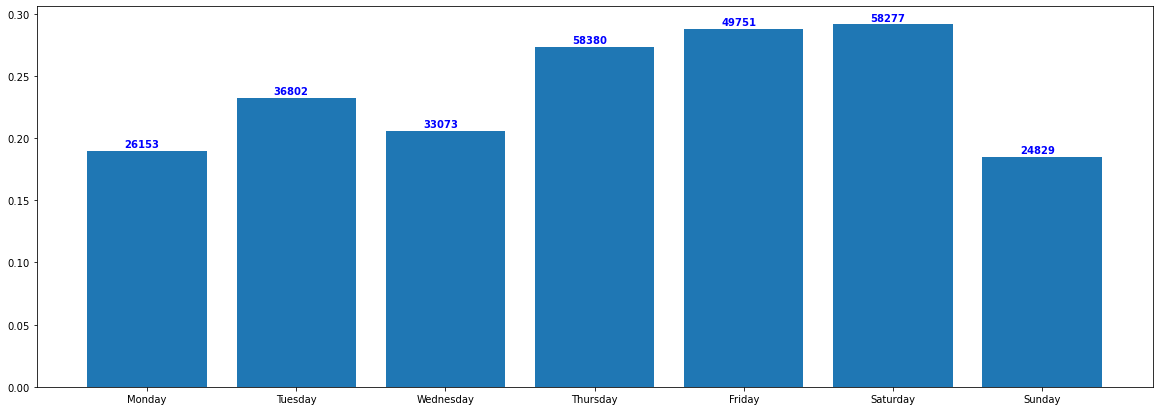

In [9]:
bar_plot(stats, w=20, h=7, r=0, d=0.15)

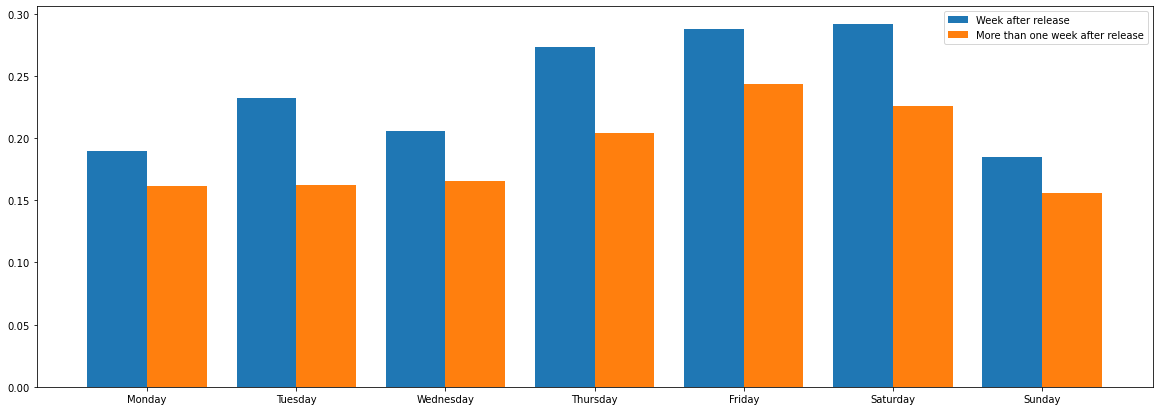

In [10]:
two_bar_plot(stats, stats_after, r=0, legend=('Week after release', 'More than one week after release'), file_name='day_release')